#Inicialización e importación de librerias para el proyecto

In [ ]:

# Para manipulación de datos
import pandas as pd
import numpy as np

# Para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Para preprocesamiento
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Para modelado
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Para evaluación
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score

# Configuraciones adicionales para una mejor visualización
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
# Ignorar warnings para una salida más limpia (opcional)
import warnings
warnings.filterwarnings('ignore')


En esta primera etapa se importaron las librerías necesarias para el análisis de datos y el desarrollo de modelos de clasificación. Se utilizaron herramientas como pandas y numpy para la manipulación de datos, matplotlib y seaborn para la visualización, y scikit-learn para el preprocesamiento, entrenamiento y evaluación de modelos como regresión logística, k-vecinos y Naive Bayes. También se configuró el entorno para mejorar la presentación de los gráficos y se suprimieron los mensajes de advertencia para mantener una salida más limpia.

# CARGA DE DATASETS

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Se montó Google Drive en el entorno de Google Colab para acceder a los archivos necesarios del proyecto. Esto permite leer y guardar datasets directamente desde la nube, facilitando la gestión y persistencia de los datos durante el análisis.

In [ ]:
try:
    df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tareas Prácticas Asincrónicas-20250717/train.csv")
    df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tareas Prácticas Asincrónicas-20250717/test.csv")
    sample_submission_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tareas Prácticas Asincrónicas-20250717/sample_submission.csv")
    print("Datasets cargados exitosamente.")
except FileNotFoundError:
    print("Error:no se encuentran los archivos  en la ruta especificada.")


Datasets cargados exitosamente.


Se cargaron correctamente tres archivos desde Google Drive: el conjunto de entrenamiento (train.csv), el conjunto de prueba (test.csv) y el archivo de envío (sample_submission.csv). Estos archivos constituyen la base de datos sobre la cual se realizará el análisis exploratorio, el entrenamiento de modelos y la posterior generación de predicciones. Se incluyó una verificación para detectar errores de carga en caso de que los archivos no se encuentren en la ruta especificada.

#COMIENZO DEL ANALISIS EXPLORATORIO DEL LOS DATASETS

In [ ]:
display(df_train.head()) # muestra las primeras 5 filas del dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4950-BDEUX,Male,0,No,No,35,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,No
1,7993-NQLJE,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,No
2,7321-ZNSLA,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,...,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,No
3,4922-CVPDX,Female,0,Yes,No,26,Yes,No,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.70,No
4,2903-YYTBW,Male,0,Yes,Yes,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.55,44.55,No


Se visualizaron las primeras cinco filas del conjunto de entrenamiento (df_train) con el objetivo de tener un primer vistazo general de la estructura del dataset, el tipo de variables disponibles y detectar posibles valores faltantes, errores de formato o codificación. Esta inspección inicial permite orientar el análisis exploratorio posterior.

**CustomerID**: Identificación del cliente

**Gender**: Genero

**SeniorCitizen**: El cliente es jubilado  (si/no)

**Partner**: cliente tiene pareja (si/no)

**Dependents**: cliente tiene personas a cargo (si/no)

**Tenure**: antigüedad del cliente en la compañía

**PhoneService**: Si tiene servicio de telefono fijo (si/no)

**MultipleLines**: el cliente tiene multiples líneas contratadas  

**InternetService**: El cliente tiene servicio de internet y que tipo de servicio

**OnlineSecurity**: Tiene seguridad remota (si/no)

**TechSupport**: El plan del cliente incluye soporte técnico (si/no)

**StreamingTV**: El cliente tiene Servicio de TV en vivo via IP (si/no)

**StreamingMovies**: El Cliente tiene servicio OTT (si/no)

**Contract**: tipo de contrato del cliente con la compañía

**PaperlessBilling**: Tipo de facturación física (si/no)

**PaymentMethod**: Tipo de pago

**MonthlyCharges**: Cargos extra por el uso de adicionales?

**TotalCharges**: Factura final

In [ ]:
display(df_train.describe())

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5634.000000,5634.000000,5634.000000,5634.000000
mean,0.163294,32.485091,64.929961,2301.319027
std,0.369667,24.568744,30.138105,2277.809211
min,0.000000,0.000000,18.400000,18.850000
25%,0.000000,9.000000,35.662500,408.850000
50%,0.000000,29.000000,70.500000,1397.475000
75%,0.000000,55.000000,90.000000,3835.825000
max,1.000000,72.000000,118.750000,8684.800000


Se utilizó el método describe() para obtener un resumen estadístico de las variables numéricas del conjunto de entrenamiento. Esta salida permitió identificar la distribución general de los datos, así como valores mínimos, máximos, medias y desviaciones estándar, lo cual resulta útil para detectar posibles outliers o variaciones significativas entre las variables.

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


Se ejecutó el método info() para obtener información estructural del dataset. Esta salida mostró la cantidad de filas, el nombre y tipo de cada columna, y cuántos valores no nulos contiene cada una. Esta revisión fue clave para detectar la presencia de valores faltantes y para entender el tipo de datos que será necesario transformar o imputar en el preprocesamiento.

In [ ]:
df_train.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Se evaluó la cantidad de valores nulos por columna mediante isnull().sum(). Esto permitió identificar qué variables presentan datos faltantes y en qué magnitud, información fundamental para definir estrategias de imputación o limpieza de datos en las etapas posteriores del preprocesamiento.

# ANALISIS UNIVARIADO - COLUNMAS NUMERICAS

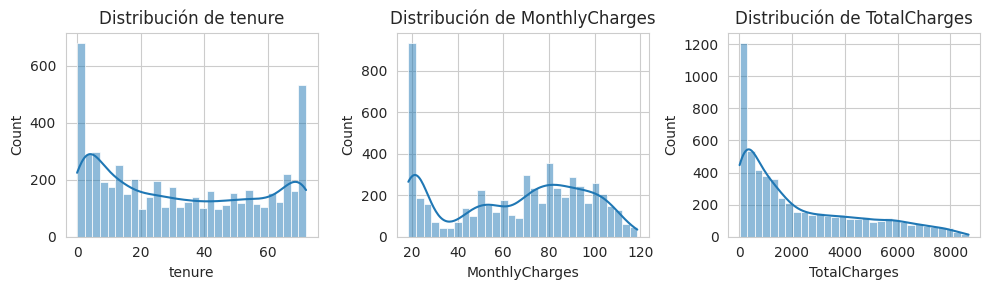

In [ ]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

n_rows = (3 + 1) // 3 # n_rows es la cantidad de filas necesarias para acomodar 3 gráficos en un mismo renglón

fig, axes = plt.subplots(n_rows, 3, figsize=(10, n_rows * 3))  #Creación de la figura y subplots

# Iterar sobre las columnas y los ejes para crear los gráficos
for i, col in enumerate(num_cols):
    sns.histplot(data=df_train, x=col, kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

El gráfico de "tenure" muestra que hay gran cantidad de clientes con poca antigüedad (clientes nuevos) y también  de clientes con alta antigüedad (clientes leales, cerca de 70 meses), con menos clientes en los rangos intermedios de antigüedad.

El gráfico de 'MonthlyCharges'  en general muestra una tendencia a tener más clientes con cargos mensuales más bajos

El gráfico de 'TotalCharges' está  fuertemente sesgado a la derecha, pero con una gran concentración de clientes con cargos totales bajos y una disminución gradual a medida que aumentan los cargos totales. Esto es esperable, ya que 'TotalCharges' es la suma de los cargos mensuales a lo largo del tiempo ('tenure'), por lo que los clientes con poca antigüedad (y, por lo tanto, bajos 'tenure') tendrán  cargos totales más bajos.

Esto último es indicador de una colinealidad que se puede estudiar mediante una matríz de correlaciones que es lo que se calcula en la siguiente celda:

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.25670,0.829055
MonthlyCharges,0.256700,1.00000,0.653850
TotalCharges,0.829055,0.65385,1.000000


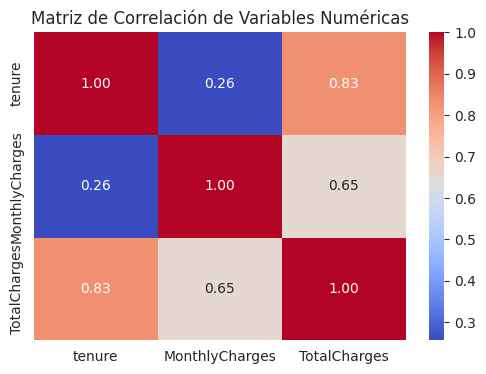

In [ ]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_num = df_train[num_cols]

correlation_matrix = df_num.corr()  # Definición de la matriz de correlación
display(correlation_matrix)

plt.figure(figsize=(6, 4))  # Visualización de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

Del mapa de calor se ve que existe colinealidad entre variables: TotalCharges es una variable derivada que depende directamente de tenure y  MonthlyCharges. Esto se debe a que a mayor antigüedad (tenure) mayor será el gasto total (TotalCharges); para el caso de gastos mensuales (monthlycharges) la correlacion está en que a mayor antigüedad y/o mayores cargos mensuales, mayores serán los cargos totales acumulados por un cliente.

A los efectos de evitar que la colinealidad encontrada afecte al modelo se va a eliminar en el preprocesamiento de los datasets la columna "TotalCharges" ya que con la variable "tenure" se tiene conocimiento de la antigüedad del cliente y con la variable "MonthlyCharges" se tiene conocimiento del gasto del cliente

# CONVERETIR TOTALCHARGES A NUMERICO POR SI HAY ERRORES

In [ ]:
df_train['TotalCharges'] = pd.to_numeric(df_train['TotalCharges'], errors='coerce')

# ANALISIS UNIVARIADO - COLUNMAS CATEGORICAS

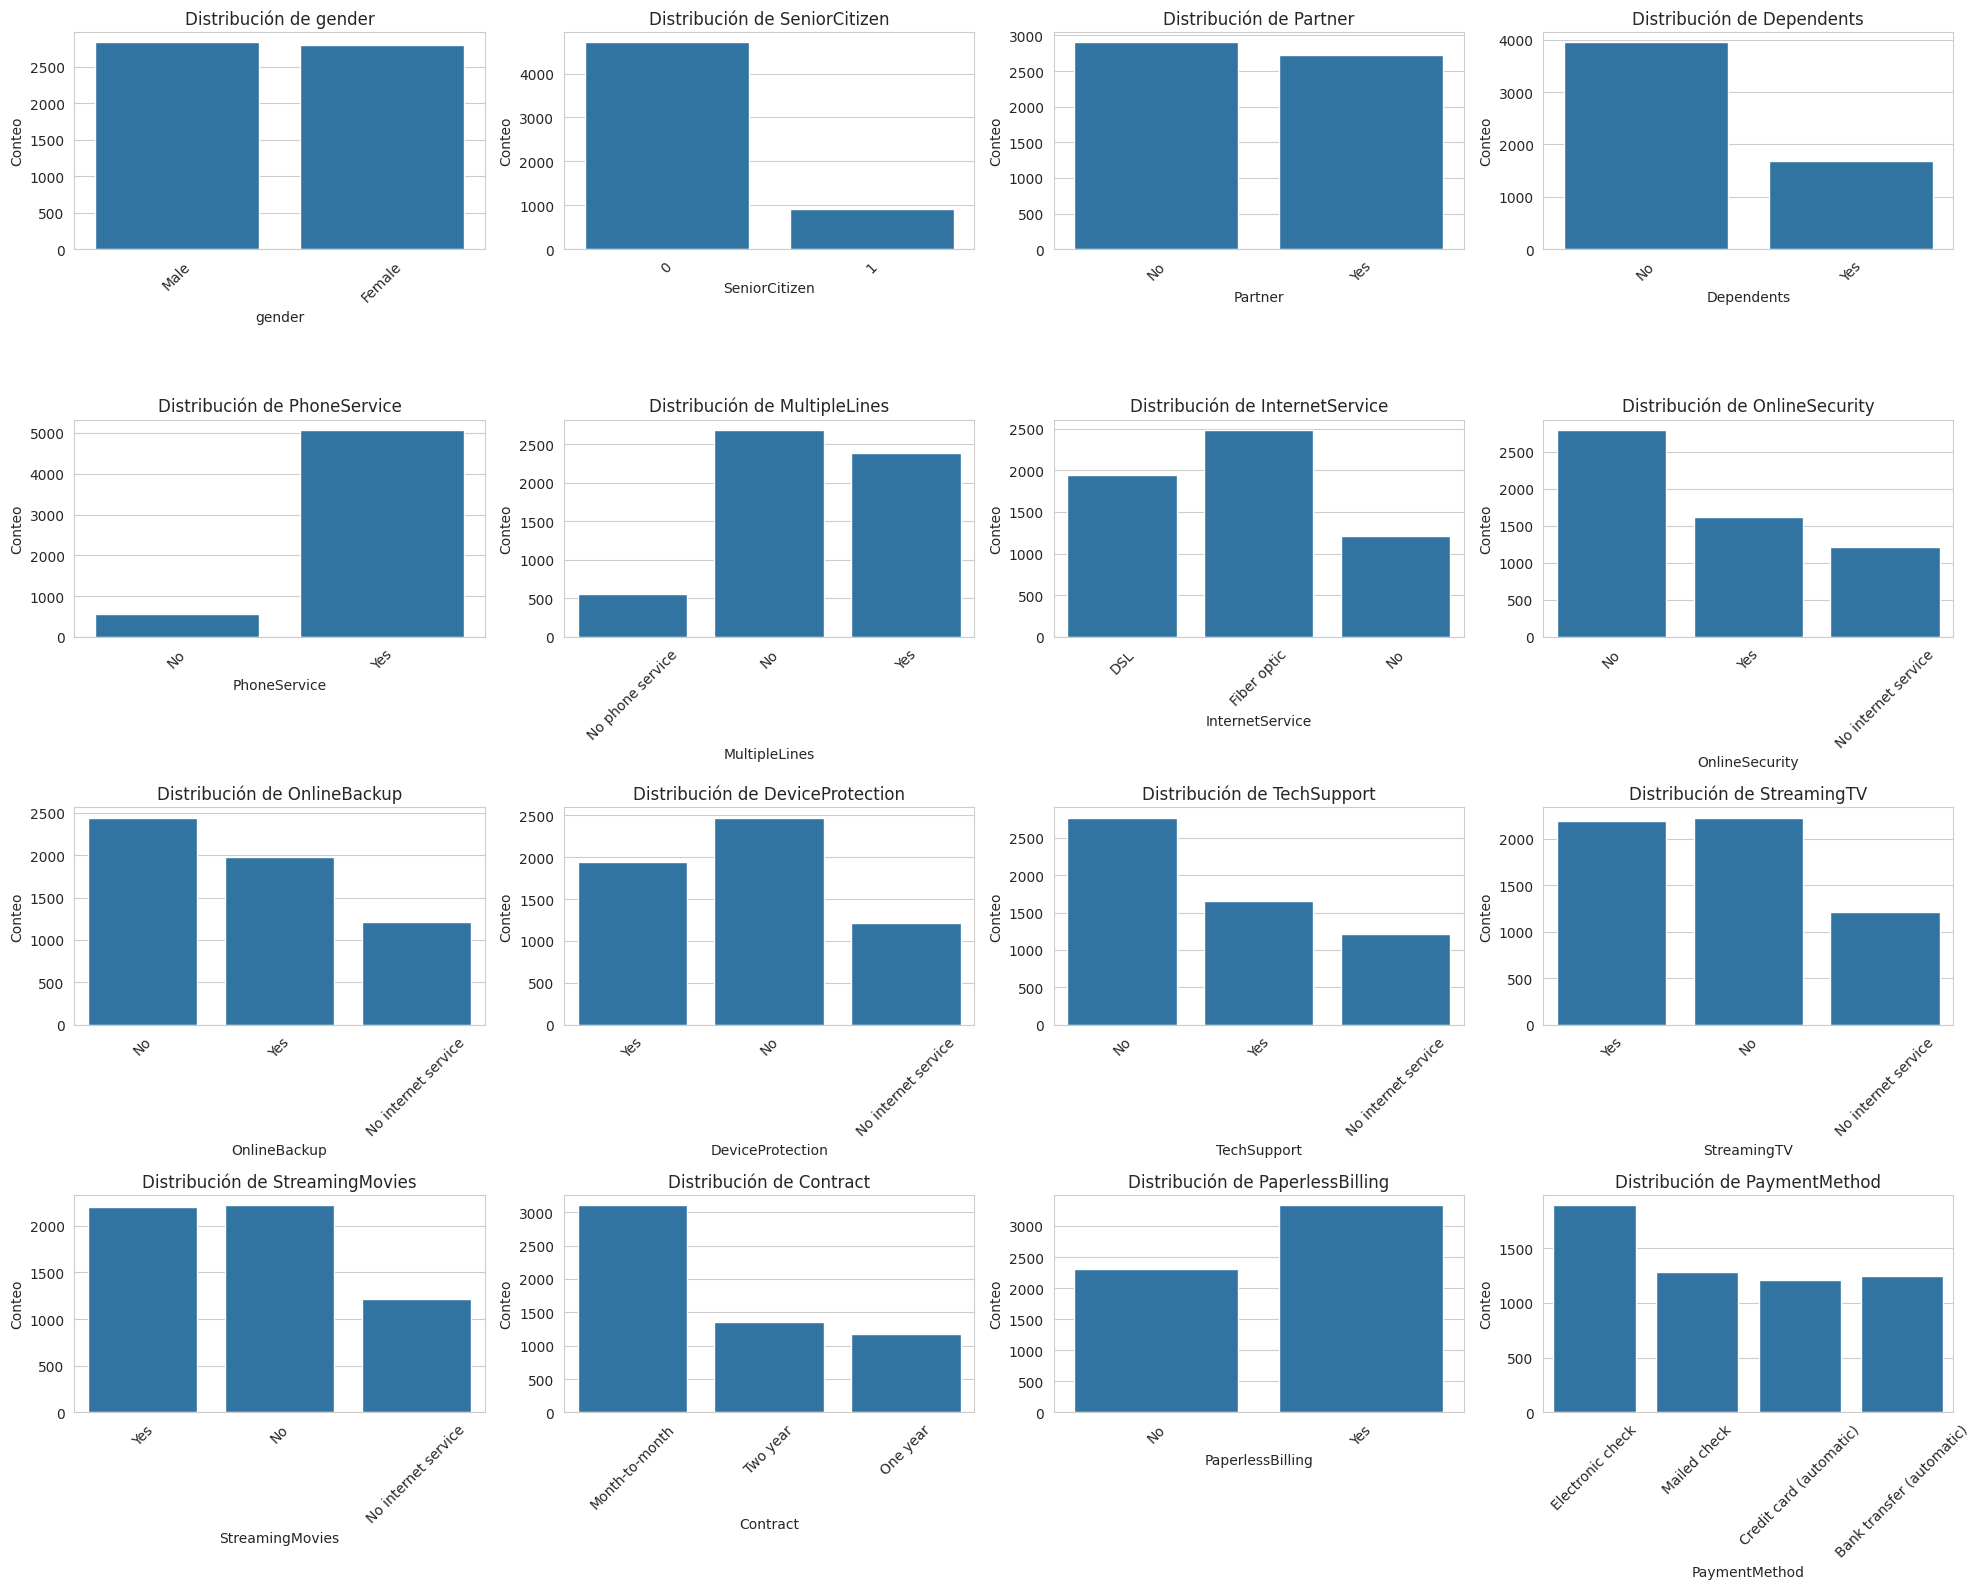

In [ ]:
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod']
# Definir el número de columnas por fila
n_cols = 4
# Calcular el número de filas necesario
n_rows = (len(cat_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4)) # Ajusta el tamaño de la figura según sea necesario
axes = axes.flatten() # Aplanar la matriz de ejes para facilitar la iteración

# Iterar sobre las columnas y crear un countplot para cada una
for i, col in enumerate(cat_cols):
    if col in df_train.columns:
        sns.countplot(data=df_train, x=col, ax=axes[i], )
        axes[i].set_title(f'Distribución de {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Conteo')
        axes[i].tick_params(axis='x', rotation=45) # Rotar etiquetas del eje x si son largas
    else:
        print(f"Advertencia: La columna '{col}' no se encuentra en df_train.")
        fig.delaxes(axes[i]) # Eliminar el subplot si la columna no existe
# Crear la figura y los subplots
plt.tight_layout() # Ajustar el layout para evitar solapamiento
plt.show()

De los gráficos obtenidos se puede ver que: En la columna "MultipleLines" hay una variable categórica "No phone service" que correspondería que tome el valor "no" ya que si no tiene servicio telefónico tampoco puede tener múltiples lineas .
Algo similar ocurre en las columnas: "InternetService", "OnlineSecurity",
    "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV",
    "StreamingMovies", donde el valor "no internet service" se puede reemplazar en la columna por el valor "No" ya que por sentido común si el cliente no tiene servicio de internet tampoco va a poder contar con los servicios que se detallan en cada una de esas columnas

In [ ]:
print(df_train.columns.tolist())


['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


#ANALISIS BIVARIADO VARIABLES CATEGORICAS

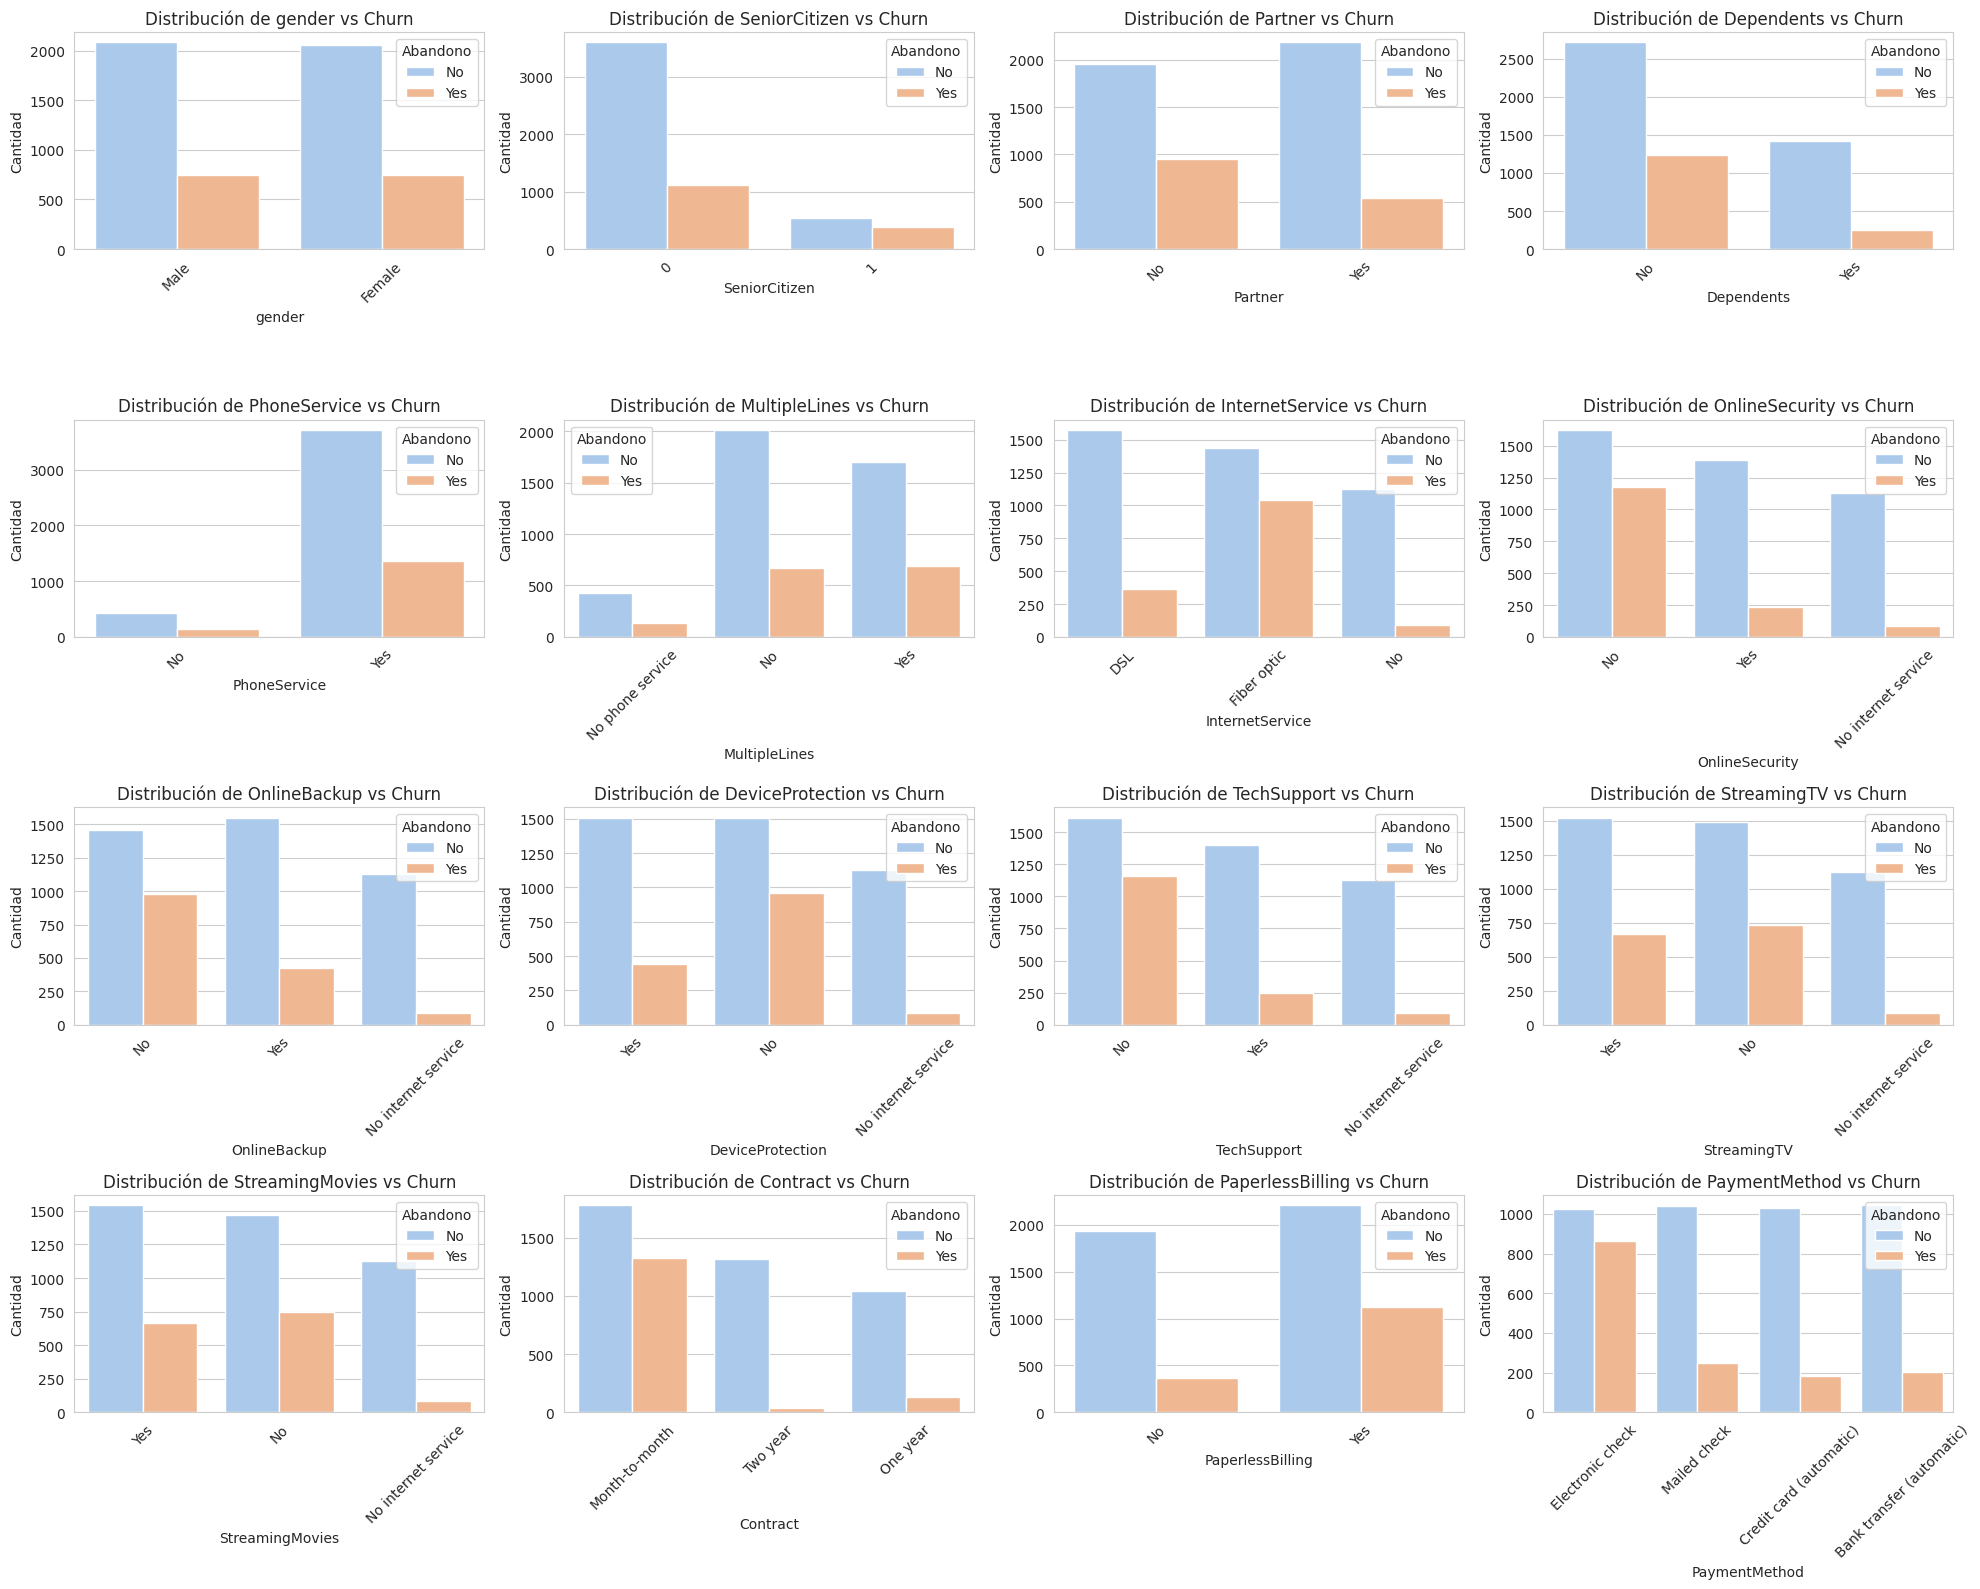

In [ ]:
# Lista de columnas categóricas
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod']

# Definir el número de columnas por fila
n_cols = 4
# Calcular el número de filas necesario
n_rows = (len(cat_cols) + n_cols - 1) // n_cols

# Crear la figura y los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4)) # Ajusta el tamaño de la figura según sea necesario
axes = axes.flatten() # Aplanar la matriz de ejes para facilitar la iteración

# Gráficos de cada categórica vs Churn
for i, col in enumerate(cat_cols):
    if i < len(axes): # Asegurarse de no exceder el número de ejes disponibles
        sns.countplot(data=df_train, x=col, hue='Churn', palette='pastel', ax=axes[i])
        axes[i].set_title(f'Distribución de {col} vs Churn') # Título en español
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Cantidad') # Etiqueta del eje y en español
        axes[i].tick_params(axis='x', rotation=45) # Rotar etiquetas del eje x si son largas
        axes[i].legend(title='Abandono') # Leyenda en español
    else:
        # Si hay más columnas que subplots, esto no debería ocurrir con el cálculo anterior,
        # pero es una seguridad.
        print(f"Advertencia: No hay suficientes subplots para la columna '{col}'.")

# Ocultar ejes no utilizados si el número de columnas no es un múltiplo de n_cols
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Ajustar el layout para evitar solapamiento
plt.show()



De los gráficos mostrados se puede ver que: "Gender": No parece afectar en la tasa de abandono entre géneros.
"SeniorCitizen": Las personas mayores parecen tener una tasa de abandono más alta en comparación con los ciudadanos de menor edad.  "Partner": Los clientes con pareja tienen una tasa de abandono menor que aquellos sin pareja.
"Dependents": Los clientes con personas a cargo tienen una tasa de abandono menor que aquellos que no las tienen.
"PhoneService":Tener servicio telefónico no parece influir en el abandono.
"MultipleLines": Los clientes con líneas múltiples parecen tener una tasa de abandono ligeramente más alta que aquellos con una sola línea o sin servicio telefónico.
"InternetService":Los clientes con servicio de internet de Fibra Óptica tienen una tasa de abandono significativamente más alta en comparación con aquellos con DSL o sin servicio de internet. Este es un indicador muy fuerte de abandono. Este gráfico indica una contradicción con la actualidad o puede deberse a que la publicacion de el datset puede ser antígua donde el servicio predominante era DSL y la fibra óptica era muy costosa.
"OnlineSecurity"; "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies": Los clientes que no tienen estos servicios en línea tienden a tener tasas de abandono más altas que aquellos que sí los tienen. Muy evidente en el caso de Soporte Técnico y la Seguridad en Línea.
"Contract": Los clientes con contratos mes a mes tienen una tasa de abandono mucho más alta que aquellos con contratos de uno o dos años. Los contratos más largos presentan un menor abandono.
"PaperlessBilling": Los clientes con facturación electrónica tienen una tasa de abandono más alta que aquellos con facturación tradicional.
"PaymentMethod": Los clientes que utilizan métodos de pago con Cheque Electrónico tienen una tasa de abandono más alta que aquellos que utilizan otros métodos de pago-



PREPROCESAMIENTO


De lo dicho anteriormente se va a hacer el preprocesamiento teniendo en cuenta que se va a eliminar la columna "TotalCharges", debido a la colinealidad con "Tenure" y "Monthlycharges"; también se van a reemplazar los valores "No internet service" por el valor "No" en las columnas previamente comentadas

In [ ]:
# Eliminar la columna 'TotalCharges' de df_train
if 'TotalCharges' in df_train.columns:
    df_train = df_train.drop(columns=['TotalCharges'])
    print("Columna 'TotalCharges' eliminada de df_train.")
else:
    print("Columna 'TotalCharges' no encontrada en df_train.")


# Eliminar la columna 'TotalCharges' de df_test
if 'TotalCharges' in df_test.columns:
    df_test = df_test.drop(columns=['TotalCharges'])
    print("Columna 'TotalCharges' eliminada de df_test.")
else:
     print("Columna 'TotalCharges' no encontrada en df_test.")

Columna 'TotalCharges' eliminada de df_train.
Columna 'TotalCharges' eliminada de df_test.


In [ ]:
columnas_servicio_internet = ['OnlineSecurity', 'OnlineBackup',
                               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Reemplazar 'No internet service' con 'No' en df_train
for col in columnas_servicio_internet:
    if col in df_train.columns:
        df_train[col] = df_train[col].replace('No internet service', 'No')
    else:
        print(f"Advertencia: La columna '{col}' no se encuentra en df_train.")

# Reemplazar 'No internet service' con 'No' en df_test
for col in columnas_servicio_internet:
    if col in df_test.columns:
        df_test[col] = df_test[col].replace('No internet service', 'No')
    else:
        print(f"Advertencia: La columna '{col}' no se encuentra en df_test.")

print("Reemplazo de valores completado para las columnas de servicio de internet en ambos dataframes.")

Reemplazo de valores completado para las columnas de servicio de internet en ambos dataframes.


#CODIFICACION DE VARIABLES CATEGORICAS BINARIAS


In [ ]:
# df_train['gender'] = df_train['gender'].map({'Female': 0, 'Male': 1})
# df_train['Partner'] = df_train['Partner'].map({'No': 0, 'Yes': 1})
# df_train['Dependents'] = df_train['Dependents'].map({'No': 0, 'Yes': 1})
# df_train['PhoneService'] = df_train['PhoneService'].map({'No': 0, 'Yes': 1})
# df_train['PaperlessBilling'] = df_train['PaperlessBilling'].map({'No': 0, 'Yes': 1})
# df_train['OnlineSecurity'] = df_train['OnlineSecurity'].map({'No': 0, 'Yes': 1})
# df_train['OnlineBackup'] = df_train['OnlineBackup'].map({'No': 0, 'Yes': 1})
# df_train['DeviceProtection'] = df_train['DeviceProtection'].map({'No': 0, 'Yes': 1})
# df_train['TechSupport'] = df_train['TechSupport'].map({'No': 0, 'Yes': 1})
# df_train['StreamingTV'] = df_train['StreamingTV'].map({'No': 0, 'Yes': 1})
# df_train['StreamingMovies'] = df_train['StreamingMovies'].map({'No': 0, 'Yes': 1})

In [ ]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
               'PaperlessBilling', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV',
               'StreamingMovies']

df_train[binary_cols] = df_train[binary_cols].replace({'No': 0, 'Yes': 1, 'Female': 0, 'Male': 1})

In [ ]:
# df_test['gender'] = df_test['gender'].map({'Female': 0, 'Male': 1})
# df_test['Partner'] = df_test['Partner'].map({'No': 0, 'Yes': 1})
# df_test['Dependents'] = df_test['Dependents'].map({'No': 0, 'Yes': 1})
# df_test['PhoneService'] = df_test['PhoneService'].map({'No': 0, 'Yes': 1})
# df_test['PaperlessBilling'] = df_test['PaperlessBilling'].map({'No': 0, 'Yes': 1})
# df_test['OnlineSecurity'] = df_test['OnlineSecurity'].map({'No': 0, 'Yes': 1})
# df_test['OnlineBackup'] = df_test['OnlineBackup'].map({'No': 0, 'Yes': 1})
# df_test['DeviceProtection'] = df_test['DeviceProtection'].map({'No': 0, 'Yes': 1})
# df_test['TechSupport'] = df_test['TechSupport'].map({'No': 0, 'Yes': 1})
# df_test['StreamingTV'] = df_test['StreamingTV'].map({'No': 0, 'Yes': 1})
# df_test['StreamingMovies'] = df_test['StreamingMovies'].map({'No': 0, 'Yes': 1})


In [ ]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
               'PaperlessBilling', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV',
               'StreamingMovies']

df_test[binary_cols] = df_test[binary_cols].replace({'No': 0, 'Yes': 1, 'Female': 0, 'Male': 1})

# CODIFICACION DE VARIABLES CATEGORICAS MULTIPLES

Se va a usar  "one-hot-encoding"  para las columnas categóricas, tomando como tales también a las que se transformaron en valores binarios

In [ ]:
multi_cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',]

df_train = pd.get_dummies(df_train, columns=multi_cat_cols, drop_first=True)
df_test = pd.get_dummies(df_test, columns=multi_cat_cols, drop_first=True)


#ESCALAR VARIABLES NUMERICAS

In [ ]:
scaler = StandardScaler()
num_cols = ['SeniorCitizen','tenure', 'MonthlyCharges']

df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_test[num_cols] = scaler.transform(df_test[num_cols])

#SEPARAR X (FEATURES) E Y (TARGET)

In [ ]:
X = df_train.drop(columns=['Churn', 'customerID'])
y = df_train['Churn']

In [ ]:

# 1) Imports
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# 2) Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


#Celda 2: GridSearchCV sobre LogisticRegression

Aquí se  utiliza GridSearchCV para encontrar los mejores hiperparámetros "C" y "Penalty" para un modelo de Regresión Logística  evaluando mediante la métrica AUC

In [ ]:
# 3) Definimos el modelo base
base_clf = LogisticRegression(solver='saga', max_iter=1000)

# 4) Parámetros a buscar
param_grid = {
    'C':       [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# 5) Ejecutamos GridSearchCV
grid = GridSearchCV(
    base_clf,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

# 6) Vemos los mejores
best_C       = grid.best_params_['C']
best_penalty = grid.best_params_['penalty']
print(f"Mejores parámetros → C={best_C}, penalty='{best_penalty}'")
print("Mejor AUC CV:", grid.best_score_)



#Celda 3: SMOTE + entrenamiento final

 A continuación se trabaja en el  desbalance de clases (y_train) utilizando la técnica SMOTE) antes de entrenar el modelo final de Regresión Logística con los mejores hiperparámetros encontrados previamente.

In [ ]:
# Celda 3: SMOTE + entrenamiento final (corregido)

import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# 7) Resampling con SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Mostrar conteos antes y después
print("Antes SMOTE:", y_train.value_counts().to_dict())
print("Después SMOTE:", pd.Series(y_res).value_counts().to_dict())

# 8) Entrenamos con los mejores hiperparámetros
final_clf = LogisticRegression(
    C=best_C,
    penalty=best_penalty,
    solver='saga',
    max_iter=1000
)
final_clf.fit(X_res, y_res)


#CELDA EVALUACION FINAL


In [ ]:
# Celda 4: Evaluación y gráficas (labels como texto)

from sklearn.metrics import (
    classification_report,
    roc_curve,
    auc,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# 9) Predicción y reporte
y_pred  = final_clf.predict(X_test)
y_proba = final_clf.predict_proba(X_test)[:, 1]  # proba de 'Yes'
print(classification_report(y_test, y_pred, target_names=['No','Yes']))

# 10) Matriz de confusión
# Las etiquetas deben coincidir con tus valores de y_test y y_pred
labels = ['No', 'Yes']
cm     = confusion_matrix(y_test, y_pred, labels=labels)
disp   = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión (SMOTE)')
plt.show()

# 11) Curva ROC
# Indica pos_label para que roc_curve sepa cuál es la clase "positiva"
fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label='Yes')
roc_auc      = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SMOTE)')
plt.legend()
plt.show()


Uno de los principales factores por el cual decidimos usar datos sintéticos es porque considerando el objetivo de la empresa (anticipar el abandono de un cliente) el modelo mostro mejor recall en los clientes que tenian churn 'yes', comparado con un entrenamiento sin datos sinteticos. Esto consideramos que era de suma importancia a pesar de que la presicion haya bajado para dicha clase ya que, es mas conveniente que la empresa tenga un modelo que anticipe la mayoria de los abandonos (recall alto) a que tenga una muy buena presicion en las predicciones.

# Modelo KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

## Entrenamiento del modelo knn

Se utilizan los datos de entrenamiento preprocesados (X_res y y_res, y se  aplica SMOTE también a KNN para comparar en igualdad de condiciones).


In [ ]:
# 1. Instanciar el modelo KNN
knn_clf = KNeighborsClassifier(n_neighbors=120)

# 2. Entrenar el modelo KNN con los datos SMOTEados
knn_clf.fit(X_res, y_res)

print("Modelo KNN entrenado exitosamente.")

Evaluación de KNN



In [ ]:
# 1. Realizar predicciones sobre el conjunto de prueba
y_pred_knn = knn_clf.predict(X_test)

# 2. Generar el reporte de clasificación
print("Reporte de Clasificación (KNN con SMOTE):")
print(classification_report(y_test, y_pred_knn, target_names=['No', 'Yes']))

# 3. Calcular la matriz de confusión
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=['No', 'Yes'])

# 4. Crear y mostrar la visualización de la matriz de confusión
disp_knn = ConfusionMatrixDisplay(cm_knn, display_labels=['No', 'Yes'])
disp_knn.plot(cmap='Blues')
plt.title('Matriz de Confusión (KNN con SMOTE)')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calcular las probabilidades de predicción para la clase 'Yes'
y_proba_knn = knn_clf.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn, pos_label='Yes')

# Calcular el área bajo la curva ROC (AUC)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr_knn, tpr_knn, label=f'AUC (KNN con SMOTE) = {roc_auc_knn:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Clasificador Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (KNN con SMOTE)')
plt.legend()
plt.show()

print(f"El valor AUC para el modelo KNN con SMOTE es: {roc_auc_knn:.3f}")

# MODELO NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Instanciar el modelo Gaussian Naive Bayes
# Naive Bayes no tiene tantos hiperparámetros críticos como otros modelos,
# a menudo funciona bien con la configuración predeterminada.
gnb_clf = GaussianNB()

# 2. Entrenar el modelo con los datos SMOTEados
# Usamos los datos resampleados para tener un conjunto de entrenamiento balanceado
gnb_clf.fit(X_res, y_res)

print("Modelo Gaussian Naive Bayes entrenado exitosamente.")

# 3. Realizar predicciones y obtener probabilidades en el conjunto de prueba
y_pred_gnb = gnb_clf.predict(X_test)
y_proba_gnb = gnb_clf.predict_proba(X_test)[:, 1] # Probabilidad de la clase 'Yes'

# 4. Evaluar el modelo
print("\nReporte de Clasificación (Gaussian Naive Bayes con SMOTE):")
print(classification_report(y_test, y_pred_gnb, target_names=['No', 'Yes']))

# 5. Matriz de confusión
cm_gnb = confusion_matrix(y_test, y_pred_gnb, labels=['No', 'Yes'])
disp_gnb = ConfusionMatrixDisplay(cm_gnb, display_labels=['No', 'Yes'])
disp_gnb.plot(cmap='Blues')
plt.title('Matriz de Confusión (Gaussian Naive Bayes con SMOTE)')
plt.show()

# 6. Curva ROC
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_proba_gnb, pos_label='Yes')
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

plt.figure()
plt.plot(fpr_gnb, tpr_gnb, label=f'AUC (Gaussian Naive Bayes con SMOTE) = {roc_auc_gnb:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Clasificador Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (Gaussian Naive Bayes con SMOTE)')
plt.legend()
plt.show()

print(f"El valor AUC para el modelo Gaussian Naive Bayes con SMOTE en el conjunto de PRUEBA es: {roc_auc_gnb:.3f}")

# COMPARACION DE MODELOS

Se muestra una tabla con los resultados obtenidos de los tres modelos testeados:



| Modelo                | AUC   | Recall (Churn) | Precision (Churn) | F1-Score |
| :-------------------- | :---- | :------------- | :---------------- | :------- |
| Regresión Logística   | 0.845 | 0.71           | 0.58              | 0.64     |
| KNN                   | 0.843 | 0.86           | 0.47              | 0.61     |
| Naive Bayes           | 0.833 | 0.80           | 0.50              | 0.62     |

**AUC (Métrica Principal en Kaggle)**

Regresión Logística (0.845) > KNN (0.843) > Naive Bayes (0.833)
La Regresión Logística tiene el mejor desempeño en discriminación de clases
(mayor AUC).

KNN y Naive Bayes están muy cerca, pero Naive Bayes es el menos performante.

**Recall (Sensibilidad - Detección de Churn)**

KNN (0.86) > Naive Bayes (0.80) > Regresión Logística (0.71)
KNN detecta mejor los casos positivos (Churn), pero a costa de más falsos positivos (baja Precision).
Si el objetivo es no perder clientes que podrían abandonar, KNN sería útil, pero con ruido.

**Precision (Calidad de Predicciones Positivas)**

Regresión Logística (0.58) > Naive Bayes (0.50) > KNN (0.47)

La Regresión Logística tiene la mayor proporción de predicciones correctas cuando dice "Sí" (Churn).

KNN tiene muchos falsos positivos (47% de sus predicciones de Churn son correctas).

**F1-Score (Balance Precision-Recall)**

Regresión Logística (0.64) > Naive Bayes (0.62) > KNN (0.61)

La Regresión Logística logra el mejor equilibrio entre Precision y Recall.



# **Conclusión**

El modelo de  Regresión Logística es el modelo principal para maximizar el valor de AUC (y sobre el que se creó el arcivo submission), además de mantener un buen equilibrio entre Precision y Recall, si se quiere usar para determinar mayores casos de "churn" positivos se puede usar KNN aunque con una precision baja.

# Generación archivo de sumisión


In [ ]:
# Entrenamiento final con el 100% de los datos disponibles
modelo_final = LogisticRegression(max_iter=1000, random_state=42)
modelo_final.fit(X, y)  # Usá aquí el X (features) y y (target) completos


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Suponiendo que 'X_test_submission' contiene los features del archivo a predecir (sin target)
predicciones = modelo_final.predict(X_test_submission)

# Si tu submission necesita probabilidades:
# predicciones = modelo_final.predict_proba(X_test_submission)[:,1]  # para obtener prob. clase 1

# Crear DataFrame de submission
submission = pd.DataFrame({
    'id': df_submission['id'],  # Reemplazar con la columna de ID correspondiente
    'churn': predicciones       # Reemplazar por el nombre correcto de la columna de predicción
})

# Guardar archivo CSV
submission.to_csv('submission_final.csv', index=False)


NameError: name 'df_submission' is not defined